# Assignment 3. Numerical Root-finding

This assignment is based on the investigation of the methods which are designed to find the root of the equation which has only one root. Particularly, the root of the equation will be estimated through graphical, two bracketing methods: bisection and false-position and two open methods: fixed-point iteration and Newton-Raphson. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In order to apply those mentioned methods we have to first find some additional functions. We are given the equation: 
                                    $$f(x)=2sin(\sqrt{x})-x+1$$
Moreover, we also need the derivative of this function:
                                    $$df(x)=\frac{cos(\sqrt{x})}{\sqrt{x}}-1$$
In addition, we have to define new function $g(x)$ that is needed for fixed point iteration method:
                                    $$g(x)=2sin(\sqrt{x})+1$$
Lastly, derivative of $g(x)$:
                                    $$dg(x)=\frac{cos(\sqrt{x})}{\sqrt{x}}$$

In [ ]:
def f(x):
    return 2*np.sin(np.sqrt(x))-x+1
def df(x):
    return (np.cos(np.sqrt(x)))/(np.sqrt(x))-1
def g(x):
    return 2*np.sin(np.sqrt(x))+1
def dg(f):
    return (np.cos(np.sqrt(x)))/(np.sqrt(x))

Secondly, we need to have some idea about the location of the root. Therefore, by plotting the graph of the function, we can estimate the interval where the root is located. 

### Part 1) 

In [ ]:
x=np.arange(0,3.5,0.1)
plt.plot(x,f(x),label="$f(x)=2sin(\sqrt{x})-x+1$")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.grid()
plt.show()

From the graphical method, it can be seen that the root of the equation
                                        $$f(x)=2sin(\sqrt{x})-x+1$$
is located at around x=2.9. However, in order to accurately estimate it, we will use two bracketing methods and two open methods. 

### Part 2) 

In [ ]:
def bisection(x_l,x_u,pres):
    x_r=0.0
    x=[]
    e=[]
    n=[]
    i=0
    while i<100:
        x_oldr=x_r
        x_r=(x_l+x_u)/2         #estimate root
        if (x_r != 0.0):
            ea=abs((x_r-x_oldr)/x_r)
            n.append(i) 
            x.append(x_r) 
            e.append(ea)
            test=f(x_l)*f(x_r)  #test to determine in which subinterval the root lies
        if (test<0.0):
            x_u=x_r
        elif (test>0.0):
            x_l=x_r
        else:
            ea=0.0
        if (ea<pres):
            break
        i=i+1   
    return n,x,e

It can be seen that the first step in bisection is to guess two values of the unknown that gives values with different signs for the function. Therefore $f(x_l)f(x_u)<0$ must be true. In this case, the lower point is 0 and upper bound is 5. An estimate of the root is determined by $$x_r=0.5(x_l+x_u)$$. We can define three possible conditions 
$f(x_l)f(x_r)<0$, $x_u=x_r$; $f(x_l)f(x_r)>0$, $x_l=x_r$, $f(x_l)f(x_r)=0$, we found the root. Where $x_l$ is lower guess, $x_u$ is upper guess and $x_r$ is a root. 
It can be seen that in order to obtain the result in $10^{-10}$ precision, we need 34 iterations.

In order to calculate the maximum precision that can be achieved with Bisection method, we will declare the error to be less than $1*10^{-16}$ since Python can show 16 digits after decimal point. It was found by finding the minimum value of the error in the list. So, it turned out that it is equal to $4.4769*10^{-16}$

In [ ]:
def bisectionPres(x_l,x_u):    #finds maximum precision
    x_r=0.0
    x=[]
    e=[]
    n=[]
    i=0
    while i<100:
        x_oldr=x_r
        x_r=(x_l+x_u)/2         #estimate root
        if (x_r != 0.0):
            ea=abs((x_r-x_oldr)/x_r) 
            n.append(i) 
            x.append(x_r) 
            e.append(ea)
            test=f(x_l)*f(x_r)  #test to determine in which subinterval the root lies
        if (test<0.0):
            x_u=x_r
        elif (test>0.0):
            x_l=x_r
        else:
            ea=0.0
        if (ea<1e-16):
            break
        pres=min(e)
        i=i+1   
    return pres
bisectionPres(0,5)

### Part 3) 

In [ ]:
def falsepos(x_l,x_u,pres):
    x_r=0.0
    x=[]
    e=[]
    n=[]
    i=0
    while i<100:
        x_oldr=x_r
        x_r=x_u-f(x_u)*(x_l-x_u)/(f(x_l)-f(x_u))         #false-position formula
        if (x_r != 0.0):
            ea=abs((x_r-x_oldr)/x_r)
            n.append(i)
            x.append(x_r)
            e.append(ea)
            test=f(x_l)*f(x_r)  #test to determine in which subinterval the root lies
        if (test<0.0):
            x_u=x_r
        elif (test>0.0):
            x_l=x_r
        else:
            ea=0.0
        if (ea<pres):
            break
        i=i+1
    return n,x,e

In this case, the lower point is 0 and upper bound is 5. The difference of false-position method from bisection method is that it takes into account the values of $f(x_l)$ and $f(x_u)$ which can be very important.
We can also define three possible conditions 
if $f(x_l)f(x_r)<0$, $x_u=x_r$; 
if $f(x_l)f(x_r)>0$, $x_l=x_r$, $f(x_l)f(x_r)=0$, we found the root. However, we apply slightly different formula: $x_r=x_u-\frac{f(x_u)(x_l-x_u)}{f(x_l)-f(x_u)}$
It can be seen that in order to obtain the result in $10^{-10}$ precision, we need 12 iterations.

In order to calculate the maximum precision that can be achieved with False-point position method, we will declare the error to be less than $1*10^{-16}$ since Python can show 16 digits after decimal point. The result was achieved by finding the minimum value of the error in the list. So, it turned out that it is equal to $1.492*10^{-16}$

In [7]:
def falseposPres(x_l,x_u):     #finds maximum precision
    x_r=0.0
    x=[]
    e=[]
    n=[]
    i=0
    while i<100:
        x_oldr=x_r
        x_r=x_u-f(x_u)*(x_l-x_u)/(f(x_l)-f(x_u))         #false-position formula
        if (x_r != 0.0):
            ea=abs((x_r-x_oldr)/x_r)
            n.append(i)
            x.append(x_r)
            e.append(ea)
            test=f(x_l)*f(x_r)   #test to determine in which subinterval the root lies
        if (test<0.0):
            x_u=x_r
        elif (test>0.0):
            x_l=x_r
        else:
            ea=0.0
        if (ea<1e-16):
            break
        pres=min(e)
        i=i+1
    return pres

### Part 4)

In [7]:
def fixpoint(x_i,pres):
    x_r=x_i
    x=[]
    e=[]
    n=[]
    i=0
    while i<100:
        x_oldr=x_r
        x_r=g(x_oldr)   #iterative formula
        if (x_r!=0):
            ea=abs((x_r-x_oldr)/x_r)
            n.append(i)
            x.append(x_r)
            e.append(ea)
        if (ea<pres):
            break
        i=i+1
    return n,x,e

In this case, since it is an open method, we have to set up an initial guess which is equal to 1. By applying the following rule:
$f(x_r)=0 => x_{i+1}=g(x_i)$. It is based on iterative computations of new estimates.
It can be seen that in order to obtain the result in $10^{-10}$ precision, we need 11 iterations.

In order to calculate the maximum precision that can be achieved with Fixed-point iteration method, we will declare the error to be less than $1*10^{-16}$ since Python can show 16 digits after decimal point. The result was achieved by finding the minimum value of the error in the list. So, it turned out that it is equal to $1.492*10^{-16}$. And it was almost the same as the max.precision by False-point position method up to some precision. 

In [8]:
def fixpointPres(x_i):      #finds maximum precision
    x_r=x_i
    x=[]
    e=[]
    n=[]
    i=0
    while i<100:
        x_oldr=x_r
        x_r=g(x_oldr)        #iterative formula
        if (x_r!=0):
            ea=abs((x_r-x_oldr)/x_r)
            n.append(i)
            x.append(x_r)
            e.append(ea)
        if (ea<1e-16):
            break
        pres=min(e)
        i=i+1
    return pres

### Part 5) 

In [10]:
def newtonraphson(x_i,pres):
    x_r=x_i
    n=[]
    x=[]
    e=[]
    i=0
    while i<100:
        x_oldr=x_r
        x_r=x_oldr-f(x_oldr)/df(x_oldr)   #Newton-Raphson formula
        if (x_r!=0):
            ea=abs((x_r-x_oldr)/x_r)
            n.append(i)
            x.append(x_r)
            e.append(ea)
        if (ea<pres):
            break
        i=i+1
    return n,x,e

In this case, since it is an open method, we have to set up an initial guess which is equal to 1. By applying the following rule:
$x_{i+1}=x_i-\frac{f(x_i)}{df(x_i)}$. This formula can be obtained by finding the slope of the function at a particular point. 
It can be seen that in order to obtain the result in $10^{-10}$ precision, we need 6 iterations.

In order to calculate the maximum precision that can be achieved with Newton-Raphson method, we will declare the error to be less than $1*10^{-16}$ since Python can show 16 digits after decimal point. It was estimated by finding the minimum value of the error in the list. So, it turned out that it is equal to $8.644*10^{-9}$.

As we can see that the maximum precision that can be reached with Newton-Raphson method is much higher than other three methods. This may indicate the quadratic convergence of Newton-Raphson method. 

In [5]:
def newtonraphsonPres(x_i):   #finds maximum precision
    x_r=x_i
    n=[]
    x=[]
    e=[]
    i=0
    while i<100:
        x_oldr=x_r
        x_r=x_oldr-f(x_oldr)/df(x_oldr)     #Newton-Raphson formula
        if (x_r!=0):
            ea=abs((x_r-x_oldr)/x_r)
            n.append(i)
            x.append(x_r)
            e.append(ea)
        if (ea<1e-16):
            break
        pres=min(e)
        i=i+1
    return pres

### Part 6) 

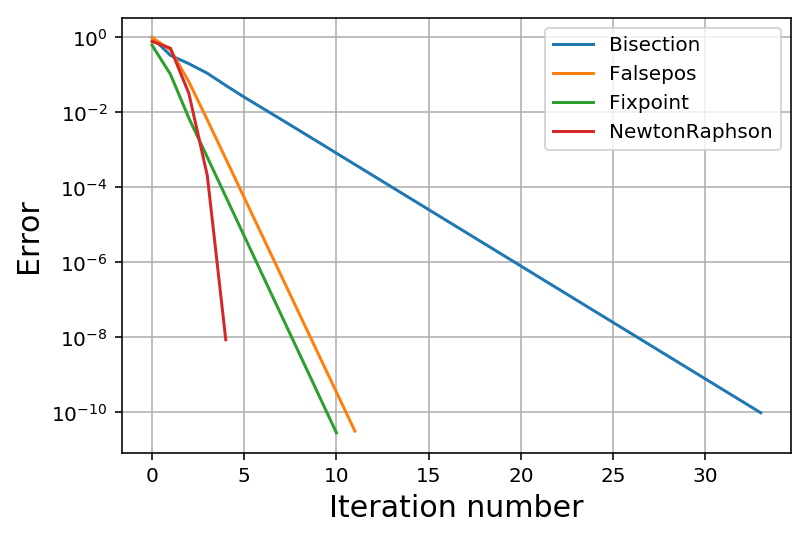

In [12]:
i1,x1,e1=bisection(0,5,1e-10)
i2,x2,e2=falsepos(0,5,1e-10)
i3,x3,e3=fixpoint(1,1e-10)
i4,x4,e4=newtonraphson(1,1e-10)

plt.plot(i1,e1,label="Bisection")
plt.plot(i2,e2,label="Falsepos")
plt.plot(i3,e3,label="Fixpoint")
plt.plot(i4,e4,label="NewtonRaphson") 

plt.legend()
plt.xlabel("Iteration number", size=15) 
plt.ylabel("Error",size=15)
plt.yscale('log')
plt.grid()
plt.show()

### Part 7) 

The above graph of the error as a function of iteration number presents the information about the convergence of the solution.

For Bisection method:
If we calculate number of iterations that we need to have to obtain precision $10^{-10}$ theoretically:
                             $$n=log_2(\frac{\delta(x^0)}{E_{a,d}})$$
We get around 35 iterations which is close to the value that we have.
And it is a linear convergent.

For False-position method:
It is somewhat more efficient than bisection method and also linearly converges to the solution. However, there are some cases where it very slowly converges. Because, one of the bracketing points may stay fixed which can lead to poor convergence. 

For Fixed-point iteration method:
It is said to be linearly convergent which is also can be seen from the graph. Moreover, theoretically we say that the error decreases when $$|dg(x)|<1$$ If we plot the graph of derivative of $g(x)$:

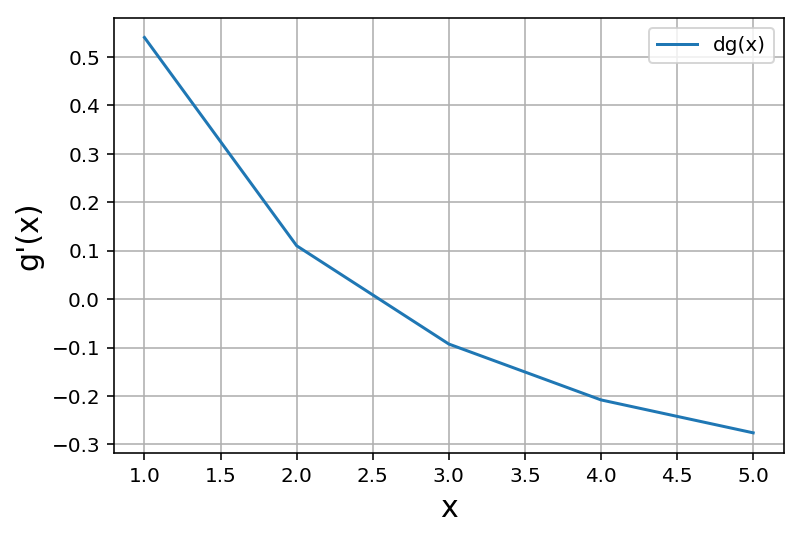

In [13]:
x=np.arange(1,6,1)
plt.plot(x,dg(x),label="dg(x)")
plt.xlabel("x",size=15)
plt.ylabel("g'(x)",size=15)
plt.legend()
plt.grid()
plt.show()

From the above graph of the derivatie function of g(x), we can see that $|g'(x)|$ is less than 1. And by the formula:
$$E_{t, i+1}=g'*E_{t,i}$$ we can see that error is indeed decreasing. 

For Newton-Raphson method:
The graph of error suggests that the error should decrease quadratically. Moreover, it also can be seen from the formula:
$$E_{t,i+1}=-\frac{f"(x_r)}{2f'(x_r)}*E_{t,i}^2$$
It means that error is roughly proportional to the square of the previous error. And number of correct decimal places roughly doubles with each iteration. This may lead to the fact that it does not require too much iterations to reach convergence. 

### Part 9) 

In [14]:
%timeit     i1,x1,e1=bisection(0,5,1e-10)

332 µs ± 41.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%timeit     i2,x2,e2=falsepos(0,5,1e-10)

302 µs ± 3.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%timeit     i3,x3,e3=fixpoint(1,1e-10)

61.8 µs ± 381 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%timeit     i4,x4,e4=newtonraphson(1,1e-10)

75.3 µs ± 5.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


By the calculation above, we can see that Fixed-point iteration was faster. While two bracketing methods were slower. However, the time to converge can be improved by changing the initial guesses and brackets. Because, in fact the speed of the methods depends on intial guesses. For instance, if we take the interval from 2.5 to 3.5 and initial guess to 2.5, they will converge faster. It can be demonstrated as follows by using these new guesses:

In [18]:
%timeit     i1,x1,e1=bisection(2.5,3.5,1e-10)

286 µs ± 4.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%timeit     i2,x2,e2=falsepos(2.5,3.5,1e-10)

197 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [20]:
%timeit     i3,x3,e3=fixpoint(2.5,1e-10)

58.1 µs ± 2.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%timeit     i4,x4,e4=newtonraphson(2.5,1e-10)

47.9 µs ± 184 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


However, by above calculated computation time, we can see that Newton-Raphson method was faster. It might be because of the fact that the closest initial guess was taken.

                                                    Conclusion:
Finally, the objectives of the experiment were achieved and the value of the root was estimated through various approaches. 
By analyzing all the data and graphs, we can say that Newton-Raphson method was faster and computationally efficient. The reason for that is it generally requires less iterations to reach the given precision. Due to the fact that error in Bisection method decreased very slowly, it was the slowest one among other methods. Overall, bracketing(bisection, false-position) methods are slower and always converge to the root, while open(fixed-point iteration, Newton-Raphson) methods are faster and sometimes they fail to converge to the root. 
However, it is also important to note that the initial guesses are very important and they definitely affect the speed of convergence. 